# Исследование поведения пользователей мобильного приложения
<a id='beginning'></a>

[`Ссылка на проект (ipynb)`](https://disk.yandex.ru/d/LW5X0z9YCMrPOA)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных-и-изучение-общей-информации-о-датафрейме" data-toc-modified-id="Загрузка-данных-и-изучение-общей-информации-о-датафрейме-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и изучение общей информации о датафрейме</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-количества-событий-на-пользователя-в-логе" data-toc-modified-id="Анализ-количества-событий-на-пользователя-в-логе-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ количества событий на пользователя в логе</a></span></li><li><span><a href="#Анализ-периода-располагаемых-данных" data-toc-modified-id="Анализ-периода-располагаемых-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ периода располагаемых данных</a></span></li><li><span><a href="#Проверка-наличия-и-качества-пользователей-в-экспериментальных-группах" data-toc-modified-id="Проверка-наличия-и-качества-пользователей-в-экспериментальных-группах-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка наличия и качества пользователей в экспериментальных группах</a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение воронки событий</a></span></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Расчет-количества-пользователей-в-экспериментальных-группах" data-toc-modified-id="Расчет-количества-пользователей-в-экспериментальных-группах-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Расчет количества пользователей в экспериментальных группах</a></span></li><li><span><a href="#Проверка-корректности-разбиения-на-экспериментальные-группы" data-toc-modified-id="Проверка-корректности-разбиения-на-экспериментальные-группы-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка корректности разбиения на экспериментальные группы</a></span></li><li><span><a href="#Анализ-результатов-проверки-гипотезы-об-изменении-шрифтов-в-мобильном-приложении" data-toc-modified-id="Анализ-результатов-проверки-гипотезы-об-изменении-шрифтов-в-мобильном-приложении-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Анализ результатов проверки гипотезы об изменении шрифтов в мобильном приложении</a></span></li><li><span><a href="#Анализ-результатов-проверки-гипотезы-об-изменении-шрифтов-в-мобильном-приложении-с-измененным-уровнем-значимости" data-toc-modified-id="Анализ-результатов-проверки-гипотезы-об-изменении-шрифтов-в-мобильном-приложении-с-измененным-уровнем-значимости-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Анализ результатов проверки гипотезы об изменении шрифтов в мобильном приложении с измененным уровнем значимости</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта
[`Перейти к содержанию проекта`](#beginning)

Необходимо разобраться, как ведут себя пользователи мобильного приложения стартапа, который продаёт продукты питания. 

**Цель исследования**    

Выявить возможные точки роста для стартапа с точки зрения поведения пользователей.

В процессе достижения цели необходимо: 
1. выявить, на каких этапах "застревают" пользователи, изучив <u>воронку продаж</u>;
2. определить, какой шрифт для мобильного приложения лучше, проанализировав результаты проведенного <u>A/A/B теста</u>.


**Описание данных**    

В нашем распоряжении лог-файл, где каждая запись — это действие пользователя или событие `logs_exp.csv`:
- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: `246` и `247` — контрольные группы, а `248` — экспериментальная.

In [174]:
import pandas as pd
import datetime as dt
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)

## Загрузка данных и изучение общей информации о датафрейме
[`Перейти к содержанию проекта`](#beginning)

In [175]:
# загрузим данные о действиях пользователей в переменную `data`
data = pd.read_csv(
    "/Users/dariasergienko/Desktop/cv/data/logs_exp.csv", sep='\t'
)

In [176]:
def desc(df):
    '''Функция выводит основные характеристики переданного датафрейма.'''
    head_rows = display(df.head())
    information = df.info()
    description = display(df.describe())
    duplicates = f'Количество полных дубликатов в датафрейме: {df.duplicated().sum()}'
    return head_rows, information, description, duplicates

In [177]:
desc(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


(None, None, None, 'Количество полных дубликатов в датафрейме: 413')

**Вывод:** В результате изучения общей информации о датафрейме можно отметить следующее:
- датафрейм содержит 244 126 строк - данных достаточно для исследования;
- названия столбцов не соответсвуют "змеиному регистру";
- тип данных столбца `EventTimestamp` необходимо привести к `datetime`;
- столбцы не содержат пропусков (так как количество `non-null`-значений равно количеству строк в датафрейме), но следует проверить столбцы `EventName` и `ExpId` на наличие загрушек вместо пропусков;
- значения `DeviceIDHash` реалистичны;
- на этапе исследовательского анализа данных необходимо проверить, данными за какой период мы располагаем;
- в датафрейме обнаружено 413 полных дубликатов (одно и то же событие несколько раз зафиксировалось в логе) - необходимо удалить дубликаты из датафрейма после проверки, нет ли зависимости появления дубликатов от каждого фактора (столбца датафрейма);
- необходимо проверить столбцы `EventName` и `ExpId` на наличие неявных дубликатов.

## Предобработка данных
[`Перейти к содержанию проекта`](#beginning)

Поменяем названия столбцов, чтобы они соответствовали "змеиному регистру":

In [178]:
data.columns = ['event_name', 'user_id', 'event_time', 'group']

Приведем тип данных столбца `event_time` необходимо к `datetime`:

In [179]:
data['event_time'] = pd.to_datetime(data['event_time'], unit='s')

Выведем отдельный столбец `event_date` только с датой события:

In [180]:
data['event_date'] = data['event_time'].dt.date
data['event_date'] = pd.to_datetime(data['event_date'])

Проверим столбцы на наличие заглушек вместо пропусков и неявных дубликатов:

In [181]:
# проверим столбец `event_name`
data['event_name'].value_counts()

event_name
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: count, dtype: int64

В столбце `event_name` нет заглушек вместо пропусков и неявных дубликатов.

In [182]:
# проверим столбец `group`
data['group'].value_counts()

group
248    85747
246    80304
247    78075
Name: count, dtype: int64

В столбце `group` нет заглушек вместо пропусков и неявных дубликатов.

Причин появления дубликатов в логе может быть много, например:
- техическая ошибка записи времени события (время, отраженное в логе, не соотвествует фактическому времени события);
- действия совершены не реальными пользователями, а ботами, что приводит к совершению одного и того же действия несколько раз в одно и то же время;
- баг в отображении страницы (независимо от пользователя перезагружается несколько раз в одну секунду) и др.

Проверим, связано ли появление в датафрейме полных дубликатов с определенных типом события, датой и временем или конкретными пользователями.

In [183]:
# проверим, для каких событий появились дубликаты в датафрейме
event_names_duplicates = (
    data[data.duplicated()]
    .groupby('event_name')
    .agg({'user_id': 'count'})
    .reset_index()
)

event_names_all = (
    data.groupby('event_name')
    .agg({'user_id': 'count'})
    .reset_index()
)

event_names_info = event_names_duplicates.merge(event_names_all, on='event_name')
event_names_info.columns = ['event_name', 'duplicates_count', 'total_count']
event_names_info['duplicates_share'] = (
    (event_names_info['duplicates_count'] / event_names_info['total_count'])
    .map(lambda x: "{0:.2%}".format(x))
)
event_names_info

,event_name,duplicates_count,total_count,duplicates_share
0,CartScreenAppear,63,42731,0.15%
1,MainScreenAppear,104,119205,0.09%
2,OffersScreenAppear,17,46825,0.04%
3,PaymentScreenSuccessful,195,34313,0.57%
4,Tutorial,34,1052,3.23%


В целом, процент дубликатов от общего числа событий в разбивке по названию события небольшой (менее 1%), кроме открытия страницы 'Tutorial' (3.23%). Нельзя связать наличие дубликатов с ошибкой записи логов при открытии определенной страницы.

In [184]:
# проверим, для каких пользователей появились дубликаты в датафрейме
users_with_duplicates = (
    data[data.duplicated()].groupby('user_id')
    .agg({'event_name': 'count'})
    .sort_values(by='event_name', ascending=False)
    .reset_index()
)
users_with_many_duplicates = users_with_duplicates['user_id'].head(3)
users_with_many_duplicates

0    3610536745613892312
1    3473691793382022823
2    4980045449118619005
Name: user_id, dtype: int64

Дубликаты появляются в логе действий разных пользователей, однако есть несколько пользователей с бОльшим числом дубликатов (список этих пользователей выведен выше). Можно направить этот списко пользователей в техническую службу для дальнейшего выявления причин появления дубликатов в логе пользователей.    
На этапе исследовательского анализа данных также следует более подробно изучить количество событий (записей) на пользователя. 

In [185]:
# проверим, в какое время появились дубликаты в датафрейме
data[data.duplicated()]['event_time'].dt.time.value_counts()

event_time
06:10:06    4
13:20:40    4
22:11:49    4
22:11:53    4
17:00:03    3
           ..
07:19:51    1
05:18:45    1
04:40:02    1
04:40:00    1
19:36:58    1
Name: count, Length: 352, dtype: int64

In [186]:
# проверим, в какие дни появились дубликаты в датафрейме
data[data.duplicated()]['event_date'].value_counts()

event_date
2019-08-01    88
2019-08-03    69
2019-08-04    65
2019-08-05    55
2019-08-02    52
2019-08-07    48
2019-08-06    34
2019-07-30     1
2019-07-31     1
Name: count, dtype: int64

Появление дубликатов не связано с определенной датой и временем.

In [187]:
# проверим, в каких группах появились дубликаты в датафрейме
data[data.duplicated()]['group'].value_counts()

group
248    165
247    125
246    123
Name: count, dtype: int64

Появление дубликатов не связано с определенной категорией пользователей в рамках A/A/B тестирования.

Удалим полные дубликаты из датафрейма.

In [188]:
data = data.drop_duplicates()
f'Количество полных дубликатов в датфрейме: {data.duplicated().sum()}' # проверка успешного удаления дубликатов

'Количество полных дубликатов в датфрейме: 0'

**Вывод:** В результате проведенной предобработки данных было сделано следующее:
- названия столбцов были изменены для соответствия "змеиному регистру";
- тип данных столбца `event_time` был приведен к `datetime`;
- был создан отдельный столбец `event_date` только с датой события;
- были удалены полные дубликаты в датафрейме (одно и то же событие, записанное в логе несколько раз);
- был составлен список пользователей с наибольшим количеством дубликатов в логе для дальнейшей передачи информации технической службе (при необходимости выявления причин появления дубликатов в логе действий пользователей);
- столбцы `event_name` и `group` были проверены на отсутсвие неявных дубликатов и заглушек вместо пропусков.

## Исследовательский анализ данных
[`Перейти к содержанию проекта`](#beginning)

На данном этапе необходимо сделать следующее:
- изучить количество событий, пользователей и событий на пользователя в логе;
- проанализировать, данными за какой период мы располагаем;
- проверить наличие пользователей из всех экспериментальных групп и попадание пользователей в одну и ту же категорию.

### Анализ количества событий на пользователя в логе
[`Перейти к содержанию проекта`](#beginning)

Посчитаем, сколько всего осталось событий и пользователей в логе, а также сколько в среднем событий приходится на пользователя:

In [189]:
f'Количество событий в логе после удаления дубликатов: {len(data)}'

'Количество событий в логе после удаления дубликатов: 243713'

In [190]:
users_count = len(data['user_id'].unique())
f'Количество пользователей в логе: {users_count}'

'Количество пользователей в логе: 7551'

In [191]:
data.head()

,event_name,user_id,event_time,group,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [192]:
# для каждого пользователя выведем количество событий
events_by_users = (
    data.groupby('user_id')
    .agg({'event_name': 'count'})
    .reset_index()
)
events_by_users.columns = ['user_id', 'events_count']
events_by_users.sort_values(by='events_count', ascending=False)

,user_id,events_count
5116,6304868067479728361,2307
147,197027893265565660,1998
3714,4623191541214045580,1768
5590,6932517045703054087,1439
1391,1754140665440434215,1221
...,...,...
6013,7399061063341528729,1
2356,2968164493349205501,1
6575,8071397669512236988,1
311,425817683219936619,1


In [193]:
avg_events_by_user = events_by_users['events_count'].mean()
median_events_by_user = events_by_users['events_count'].median()

print(f'Среднее количество событий на пользователя: {avg_events_by_user:.0f}')
print(f'Медианное количество событий на пользователя: {median_events_by_user:.0f}')

Среднее количество событий на пользователя: 32
Медианное количество событий на пользователя: 20


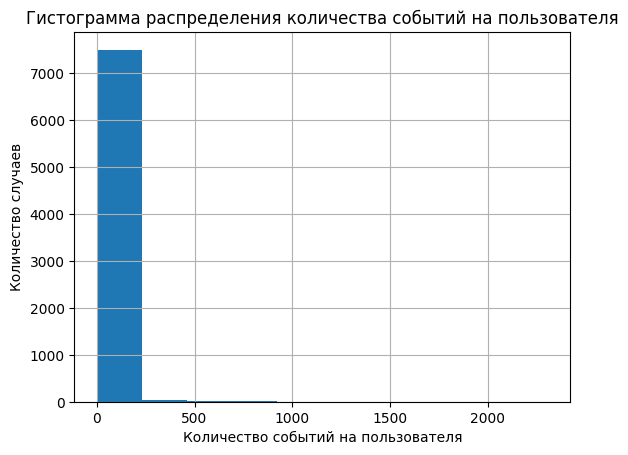

In [194]:
# выведем гистограмму распределения количества событий на пользователя
events_by_users['events_count'].hist()
plt.title('Гистограмма распределения количества событий на пользователя')
plt.xlabel('Количество событий на пользователя')
plt.ylabel('Количество случаев')
plt.show()

In [195]:
events_by_users['events_count'].describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: events_count, dtype: float64

Как видно по гистограмме распределения и значений квартилей, есть пользователи с аномально редким большим числом событий (максимальное число событий на пользователя - 2307, при 75-процентиле в 37 событий). Также среднее количество событий на пользователя больше медианного, что говорит о влиянии аномально больших выбросов на значение средней.    

Акцент дальнейшего исследования - анализ долей пользователей, которые совершили какое-либо событие, поэтому нас в большей степени будет интересовать факт совершения пользователем события хотя бы 1 раз и в меньшей - количество раз, которое пользователь совершал каждое событие. Поэтому в рамках данного исследования мы не будем удалять из датафрейма аномально активных пользователей. Однако, стоит обратить внимание на пользователей, которые совершают необычно много действий: это могут быть боты или же ошибки в загрузке страницы ("залипание") - например, ниже выведена таблица с дейтсвиями пользователя с `user_id = 6304868067479728361`, откуда мы видим, что, например, `2019-08-02` пользователь совершает практически каждую секунду цепочку действий `зайти в корзину - оплатить покупку`, не нереключаясь на выбор товаров, что странно.

In [196]:
data.query('user_id == 6304868067479728361').sort_values(by='event_time')

,event_name,user_id,event_time,group,event_date
32936,MainScreenAppear,6304868067479728361,2019-08-01 18:01:25,248,2019-08-01
32947,CartScreenAppear,6304868067479728361,2019-08-01 18:01:43,248,2019-08-01
32948,PaymentScreenSuccessful,6304868067479728361,2019-08-01 18:01:43,248,2019-08-01
32950,MainScreenAppear,6304868067479728361,2019-08-01 18:01:44,248,2019-08-01
32951,OffersScreenAppear,6304868067479728361,2019-08-01 18:01:52,248,2019-08-01
...,...,...,...,...,...
232580,OffersScreenAppear,6304868067479728361,2019-08-07 14:54:24,248,2019-08-07
232587,CartScreenAppear,6304868067479728361,2019-08-07 14:54:28,248,2019-08-07
232599,OffersScreenAppear,6304868067479728361,2019-08-07 14:54:41,248,2019-08-07
242310,MainScreenAppear,6304868067479728361,2019-08-07 19:26:20,248,2019-08-07


### Анализ периода располагаемых данных
[`Перейти к содержанию проекта`](#beginning)

Проверим, данными за какой период мы располагаем:

In [197]:
min_date = min(data['event_date'])
max_date = max(data['event_date'])

print(f'Минимальная дата события в логе: {min_date}')
print(f'Максимальная дата события в логе: {max_date}')

Минимальная дата события в логе: 2019-07-25 00:00:00
Максимальная дата события в логе: 2019-08-07 00:00:00


In [198]:
dates = (
    data.groupby('event_date')
    .agg({'event_name': 'count'})
    .reset_index()
)
dates.columns = ['event_date', 'events_count']
dates

,event_date,events_count
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


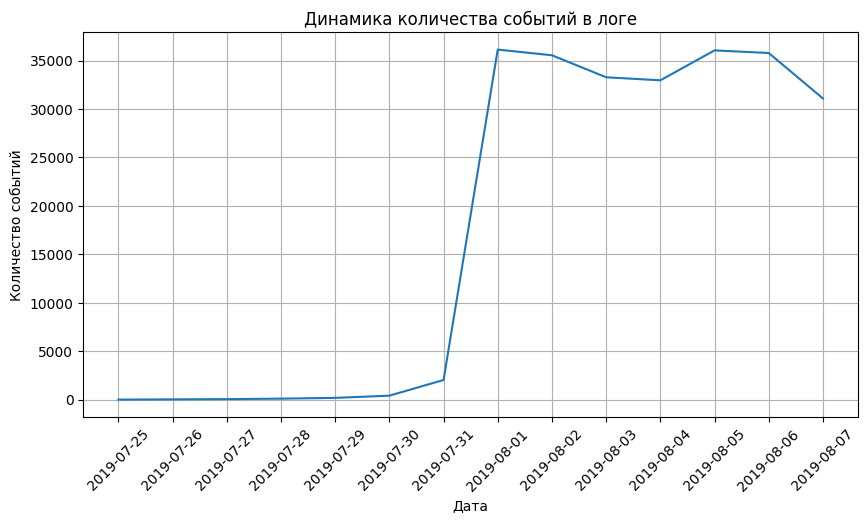

In [199]:
plt.figure(figsize=(10, 5))
plt.plot(dates['event_date'], dates['events_count'])
plt.title('Динамика количества событий в логе')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(ticks=dates['event_date'], rotation=45)
plt.grid(True)
plt.show()

Мы располагаем данными за период с `2019-07-25` по `2019-08-07`. Однако, как видно на графике динамики количества событий в логе, начиная с `2019-08-01`, записей в логе за день становится резко больше: есть основания полагать, что данные до `2019-08-01` неполные.    
Действительно, в дополнительной информации к задаче исследования указано, что технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные».

Посмотрим более детально данные за `2019-07-31` (в разбивке по часам), чтобы отпределить более точно, когда начинается всплеск количества событий.

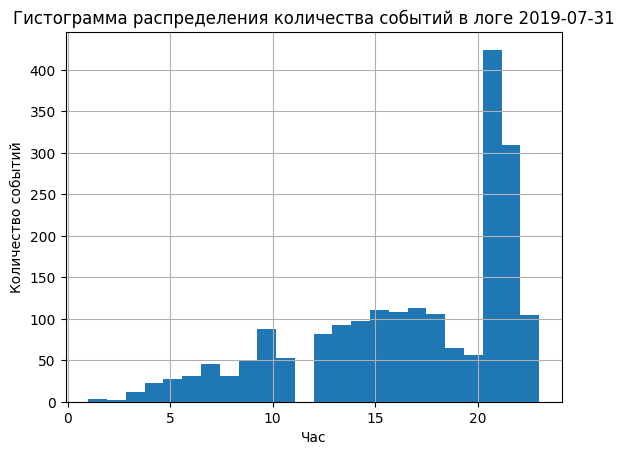

In [200]:
events_31_hours = data.query('event_date == "2019-07-31"')['event_time'].dt.hour

events_31_hours.hist(bins=24)
plt.title('Гистограмма распределения количества событий в логе 2019-07-31')
plt.xlabel('Час')
plt.ylabel('Количество событий')
plt.grid(True)
plt.show()

Если посмотреть также на данные по часам мы увидим, что первый всплеск приходится на `2019-07-31` 21-00. Но доля этих значений незначительна, поэтому мы можем проигнорировать их без существенных потерь.

Таким образом, на самом деле, мы располагаем данными за период с `2019-08-01` по `2019-08-07` включительно.

Посчитаем, сколько событий и пользователей мы потеряем, если удалим более старые данные (до `2019-07-31` включительно).

In [201]:
events_cleared = len(data.query('event_time >= "2019-08-01"')) / len(data)
f'Процент событий, который останется после удаления данных до "2019-07-31" включительно: {events_cleared:.2%}'

'Процент событий, который останется после удаления данных до "2019-07-31" включительно: 98.84%'

In [202]:
users_cleared = len(data.query('event_time >= "2019-08-01"')['user_id'].unique()) / len(data['user_id'].unique())
f'Процент пользователей, который останется после удаления данных до "2019-07-31" включительно: {users_cleared:.2%}'

'Процент пользователей, который останется после удаления данных до "2019-07-31" включительно: 99.77%'

Так как после удаления старых данных (до `2019-07-31` включительно) мы потеряем менее 2% событий и менее 1% пользователей, удалим эти данные из датафрейма.

In [203]:
data = data.query('event_time >= "2019-08-01"')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240887 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  240887 non-null  object        
 1   user_id     240887 non-null  int64         
 2   event_time  240887 non-null  datetime64[ns]
 3   group       240887 non-null  int64         
 4   event_date  240887 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.0+ MB


### Проверка наличия и качества пользователей в экспериментальных группах
[`Перейти к содержанию проекта`](#beginning)

Проверим, что в датафрейме есть пользователи всех экспериментальных групп:

In [204]:
# количество событий в датафрейме для каждой экспериментальной группы 
data.groupby('group').agg({'user_id': 'count'})

,user_id
group,
246,79302
247,77022
248,84563


In [205]:
# количество пользователей в датафрейме для каждой экспериментальной группы 
data.groupby('group').agg({'user_id': 'nunique'})

,user_id
group,
246,2484
247,2513
248,2537


В датафрейме есть пользователи всех экспериментальных групп и число событий и пользователей каждой группы сопоставимы между собой.

Проверим, что одни и те же пользователи не попадают в несколько экспериментальных групп одновременно:

In [206]:
# в отдельный список отберем все уникальные `user_id` из группы `246`
user_id_246 = data.query('group == 246')['user_id'].unique()

# в отдельный список отберем всех уникальных пользователей, которые попали группы `246` и `247` одновременно
id_in_246_247 = data.query('group == 247 and  user_id in @user_id_246')['user_id'].unique()

# в отдельный список отберем всех уникальных пользователей, которые попали группы `246` и `248` одновременно
id_in_246_248 = data.query('group == 248 and  user_id in @user_id_246')['user_id'].unique()

print(f'Количество пользователей, которые попали в группы 246 и 247 одновременно: {len(id_in_246_247)}')
print(f'Количество пользователей, которые попали в группы 246 и 248 одновременно: {len(id_in_246_248)}')

Количество пользователей, которые попали в группы 246 и 247 одновременно: 0
Количество пользователей, которые попали в группы 246 и 248 одновременно: 0


In [207]:
# в отдельный список отберем все уникальные `user_id` из группы `247`
user_id_247 = data.query('group == 247')['user_id'].unique()

# в отдельный список отберем всех уникальных пользователей, которые попали группы `247` и `248` одновременно
id_in_247_248 = data.query('group == 248 and  user_id in @user_id_247')['user_id'].unique()

print(f'Количество пользователей, которые попали в группы 247 и 248 одновременно: {len(id_in_247_248)}')

Количество пользователей, которые попали в группы 247 и 248 одновременно: 0


В датафрейме не выявлено пользователей, которые попали в несколько экспериментальных групп одновременно.

**Вывод:** В результате проведенного исследовательского анализа данных было выявлено следующее:
- Количество событий в логе - 243713. Количество пользователей в логе - 7551. Среднее количество событий на пользователя - 32, а медианное количество событий на пользователя: 20. Однако, в логе есть пользователи с аномально большим числом событий (максимальное число событий на пользователя - 2307):
    - Акцент дальнейшего исследования - анализ долей пользователей, которые совершили какое-либо событие, поэтому нас в большей степени будет интересовать факт совершения пользователем события хотя бы 1 раз и в меньшей - количество раз, которое пользователь совершал каждое событие. Поэтому в рамках данного исследования мы не будем удалять из датафрейма аномально активных пользователей. 
    - Тем не менее, стоит обратить внимание на пользователей, которые совершают необычно много действий: это могут быть боты или же ошибки в загрузке страницы ("залипание"). Например, один из пользователей в определенный день совершает практически каждую секунду цепочку действий `зайти в корзину - оплатить покупку`, не нереключаясь на выбор товаров.
- Данные до `2019-07-31`, предположительно, неполные, поэтому были удалены из датафрейма;
- В датафрейме есть пользователи всех экспериментальных групп, и число событий и пользователей каждой группы сопоставимы между собой.
- В датафрейме не выявлено пользователей, которые попали в несколько экспериментальных групп одновременно.

## Изучение воронки событий
[`Перейти к содержанию проекта`](#beginning)

Посмотрим, какие события есть в логе, и как часто они встречаются. Отсортируем события по частоте.

In [208]:
events_freq = (
    data.groupby('event_name')
    .agg({'user_id': 'count'})
    .reset_index()
    .sort_values(by='user_id', ascending=False)
)
events_freq.columns = ['event_name', 'event_count']
events_freq

,event_name,event_count
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


В логе есть 5 типов событый:
- открытие страницы "главный экран";
- открытие страницы "предложения";
- открытие страницы "корзина";
- открытие страницы "успешная оплата покупки";
- открытие страницы "справка".

Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [209]:
# число уникальных пользователей в датафрейме
total_users = len(data['user_id'].unique())
total_users

7534

In [210]:
events_users = (
    data.groupby('event_name')
    .agg({'user_id': 'nunique'})
    .reset_index()
    .sort_values(by='user_id', ascending=False)
)
events_users.columns = ['event_name', 'users_count']
events_users['share'] = (events_users['users_count'] / total_users).map(lambda x: "{0:.2%}".format(x))
events_users

,event_name,users_count,share
1,MainScreenAppear,7419,98.47%
2,OffersScreenAppear,4593,60.96%
0,CartScreenAppear,3734,49.56%
3,PaymentScreenSuccessful,3539,46.97%
4,Tutorial,840,11.15%


In [211]:
# выделим пользователей, которые в датафрейме не совершали открытие главной страницы и для них выведем первый этап
users_main_page = data.query('event_name == "MainScreenAppear"')['user_id'].unique()
(
    data.query('user_id not in @users_main_page')
    .sort_values(by=['user_id', 'event_time'])
    .groupby('user_id')
    .agg({'event_name': 'first', 'event_date': 'first'})
)

,event_name,event_date
user_id,,
74158328448226259,PaymentScreenSuccessful,2019-08-01
111394506613435756,PaymentScreenSuccessful,2019-08-02
214966247576341063,OffersScreenAppear,2019-08-01
261817378841141406,PaymentScreenSuccessful,2019-08-02
332529825412858125,OffersScreenAppear,2019-08-01
...,...,...
8586953157808767383,OffersScreenAppear,2019-08-03
8804319115517716344,PaymentScreenSuccessful,2019-08-02
8821171531680573201,OffersScreenAppear,2019-08-02


Предположительно, события происходят в следующем порядке:
1. открытие страницы "главный экран" (MainScreenAppear);
2. открытие страницы "предложения" (OffersScreenAppear);
3. открытие страницы "корзина" (CartScreenAppear);
4. открытие страницы "успешная оплата покупки" (PaymentScreenSuccessful).

При этом, событие `открытие страницы "справка" (Tutorial)` не встраивается в последовательную цепочку, так как может открываться пользователем на любом этапе, и от этого события не зависит напрямую осуществление покупки пользователем.     
Также, теоретически, пользователь может пропустить шаг `открытие страницы "предложения" (OffersScreenAppear)` и сразу перейти к корзине с главного экрана, если на нем представлены какие-либо товары, или открыть корзину с ранее сохраненными в ней товарами для последующей оплаты. Однако, учитывая то, что альтернативного открытию страницы "предложения" события в логах не представлено (например, поиск товара по названию), будем считать, что этот шаг является обязательным (как выбор из меню).

Как видно из таблицы выше, не все пользователи совершали открытие главной страницы (событие MainScreenAppear) - есть 115 пользователей, которые сразу совершали другие действия (причем, не только `открытие страницы "справка" (Tutorial)`) - возможно, данные о первых действиях этих пользователей не входят в изучаемый временной интервал. Так как доля таких пользователей крайне маленькая, то при расчете воронки будем считать за максимальное количество пользователей число совершивших первое событие - `открытие страницы "главный экран" (MainScreenAppear)`.

По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). Также посчитаем, какая доля пользователей проходит на каждый шаг воронки от числа пользователей на первом шаге. При расчете воронки не будем учитывать события типа `открытие страницы "справка" (Tutorial)`:

In [212]:
# для воронки удалим из датафрейма события типа `Tutorial`
data_for_funnel = data.query('event_name != "Tutorial"')

In [213]:
data_for_funnel.head()

,event_name,user_id,event_time,group,event_date
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01


In [214]:
funnel = (
    data_for_funnel.groupby('event_name')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
    .reset_index()
)

funnel.columns = ['event_name', 'users_count']

funnel['next_step_share'] = round(
    (funnel['users_count'] / funnel['users_count'].shift(1)), 2
)

funnel.loc[0, 'next_step_share'] = 1

funnel["first_step_share"] = round(
    (funnel["users_count"] / funnel.loc[0, "users_count"]), 2
)

funnel

,event_name,users_count,next_step_share,first_step_share
0,MainScreenAppear,7419,1.00,1.00
1,OffersScreenAppear,4593,0.62,0.62
2,CartScreenAppear,3734,0.81,0.50
3,PaymentScreenSuccessful,3539,0.95,0.48


In [215]:
fig = go.Figure(go.Funnel(y = funnel['event_name'],
                          x = funnel['users_count'],
                          textposition = 'inside',
                          textinfo = 'value + percent previous'))
fig.update_layout(title='Воронка событий, % пользователей', title_x = 0.5)
fig.show()

**Вывод:** В целом, до оплаты доходит менее половины пользователей (48%). 

Больше всего пользователей теряется на втором шаге `открытие страницы "предложения" (OffersScreenAppear)`, то есть, сразу после открытия главной страницы (открытия приложения) - 38% не продолжают взаимодействовать с приложением. Для удержания пользователей на этом этапе можно вывести на главную страницу дополнительные привлекающие внимание специальные предложения/акции.   

Не переходят к добавлению товаров в корзину 19% пользователей, которые просмотрели предложенные товары. Для дополнительного удержания пользователей на данном этапе можно направить усилия на развитие систем рекомендаций и специальных предложений для первых покупок. Однако, удержание пользователей, которые уходят после просмотра главной страницы, является наиболее приоритетной точкой для развития.

Пользователи, которые добавили товар в корзину уже, как правило, становятся покупателями: только 5% пользователей не осуществляют ни одной покупки после добавления товаров в корзину. Для того, чтобы подтолкнуть пользователей к оплате собранной корзины можно настроить систему рассылки напоминаний о выбранных ранее товарах.

## Изучение результатов эксперимента
[`Перейти к содержанию проекта`](#beginning)

### Расчет количества пользователей в экспериментальных группах
[`Перейти к содержанию проекта`](#beginning)

Выведем, сколько пользователей в каждой группе.

In [216]:
users_by_groups = (
    data.groupby('group')
    .agg({'user_id': 'nunique'})
)
users_by_groups.columns = ['Total_users']
users_by_groups

,Total_users
group,
246,2484
247,2513
248,2537


In [217]:
users_246 = int(users_by_groups.loc[246, 'Total_users'])
users_247 = int(users_by_groups.loc[247, 'Total_users'])
users_248 = int(users_by_groups.loc[248, 'Total_users'])

print(f'Превышение числа пользователей группы 247 над группой 246: {(users_247 -  users_246) / users_246:.2%}')
print(f'Превышение числа пользователей группы 248 над группой 246: {(users_248 -  users_246) / users_246:.2%}')
print(f'Превышение числа пользователей группы 248 над группой 247: {(users_248 -  users_247) / users_247:.2%}')

Превышение числа пользователей группы 247 над группой 246: 1.17%
Превышение числа пользователей группы 248 над группой 246: 2.13%
Превышение числа пользователей группы 248 над группой 247: 0.96%


Количество пользователей в каждой группы отличается незначительно (на 1-2%). Ранее на этапе исследовательского анализа данным мы уже проверили, что каждый пользователь принадлежит только одной экспериментальной группе.

### Проверка корректности разбиения на экспериментальные группы
[`Перейти к содержанию проекта`](#beginning)

Проверим, находят ли статистические критерии разницу между выборками `246` и `247`. Сформулируем гипотезы.

**Нулевая гипотеза:** различий в долях пользователей, совершивших событие, между группами нет.    
**Альтернативная гипотеза:** различия в долях между группами есть.

Установим уровень значимости `alpha = 0.1`

Выведем таблицу с количеством пользователей, совершивших каждое событие, по каждой экспериментальной группе:

In [218]:
users_count = data.pivot_table(
        index = 'group',
        columns = 'event_name',
        values = 'user_id',
        aggfunc = 'nunique')
users_count = users_count.merge(users_by_groups, on='group')
users_count = users_count.drop('Tutorial', axis='columns')

users_count.loc['246+247'] = users_count.loc[246] + users_count.loc[247] 
# добавили в таблицу строку с суммарным числов пользователей двух контрольных групп

users_count

,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Total_users
group,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537
246+247,2504,4926,3062,2358,4997


In [219]:
def hypothesis_test (users_events_groups, users_group, alpha):
    '''Функция для проверки гипотез'''
    # доля пользователей первой группы, совершивших событие
    share_1 = users_events_groups[0] / users_group[0]
    # доля пользователей второй группы, совершивших событие
    share_2 = users_events_groups[1] / users_group[1]
    # доля пользователей обеих групп, совершивших событие
    share_1_2 = (users_events_groups[0] + users_events_groups[1]) / (users_group[0] + users_group[1])
    
    z_value = (share_1 -  share_2) / mth.sqrt(share_1_2 *(1-share_1_2) * (1/users_group[0] + 1/users_group[1]))
    
    distr = st.norm(0, 1) 
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'p-значение: {p_value:.3f}')
    
    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу: есть основания считать различия в долях пользователей, совершивших событие, между группами статистически значимыми')
        print('')
    else:
        print("Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми")
        print('')

In [220]:
def all_events (group_1, group_2, alpha):
    total_users = ([users_count['Total_users'][group_1], \
                    users_count['Total_users'][group_2]])
    users_MainScreenAppear = ([users_count['MainScreenAppear'][group_1], \
                               users_count['MainScreenAppear'][group_2]])
    users_OffersScreenAppear = ([users_count['OffersScreenAppear'][group_1], \
                                 users_count['OffersScreenAppear'][group_2]])
    users_CartScreenAppear = ([users_count['CartScreenAppear'][group_1], \
                               users_count['CartScreenAppear'][group_2]])
    users_PaymentScreenSuccessful = ([users_count['PaymentScreenSuccessful'][group_1], \
                                      users_count['PaymentScreenSuccessful'][group_2]])
    
    print('Результаты теста для события MainScreenAppear')
    hypothesis_test(users_MainScreenAppear, total_users, alpha)
    
    print('Результаты теста для события OffersScreenAppear')
    hypothesis_test(users_OffersScreenAppear, total_users, alpha)
    
    print('Результаты теста для события CartScreenAppear')
    hypothesis_test(users_CartScreenAppear, total_users, alpha)
    
    print('Результаты теста для события PaymentScreenSuccessful')
    hypothesis_test(users_PaymentScreenSuccessful, total_users, alpha)

Проверим наличие различий в долях пользователей, совершивших каждой событие, между двумя контрольными группами `246` и `247`:

In [221]:
all_events(246, 247, 0.1)

Результаты теста для события MainScreenAppear
p-значение: 0.757
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события OffersScreenAppear
p-значение: 0.248
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события CartScreenAppear
p-значение: 0.229
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события PaymentScreenSuccessful
p-значение: 0.115
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми



В результате проведенного теста по всем событиям воронки, статистически значимые различия между контрольными группам не выявлены. Есть основания полагать, что разбиение групп работает корректно.

### Анализ результатов проверки гипотезы об изменении шрифтов в мобильном приложении 
[`Перейти к содержанию проекта`](#beginning)

Выведем результаты теста, последовательно сравнив каждую контрольную группу с экспериментальной, а также объединенную контрольную группу с экспериментальной.

**Нулевая гипотеза:** различий в долях пользователей, совершивших событие, между контрольной группой `246` и экспериментальной группой с измененным шрифтом `248` нет.    
**Альтернативная гипотеза:** различия в долях между группами есть.

Установим уровень значимости `alpha = 0.1`

In [222]:
all_events(246, 248, 0.1)

Результаты теста для события MainScreenAppear
p-значение: 0.295
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события OffersScreenAppear
p-значение: 0.208
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события CartScreenAppear
p-значение: 0.078
Отвергаем нулевую гипотезу: есть основания считать различия в долях пользователей, совершивших событие, между группами статистически значимыми

Результаты теста для события PaymentScreenSuccessful
p-значение: 0.212
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми



In [223]:
share_246_cart = users_count['CartScreenAppear'][246] / users_count['Total_users'][246]
share_248_cart = users_count['CartScreenAppear'][248] / users_count['Total_users'][248]

print(f'Доля пользователей группы 246, совершивших открытие корзины: {share_246_cart:.2%}')
print(f'Доля пользователей группы 248, совершивших открытие корзины: {share_248_cart:.2%}')

Доля пользователей группы 246, совершивших открытие корзины: 50.97%
Доля пользователей группы 248, совершивших открытие корзины: 48.48%


В результате проведенного теста, по всем событиям воронки, кроме `CartScreenAppear`, статистически значимые различия между контрольной группой `246` и экспериментальной не выявлены.  
На 10% уровне значимости можно утверждать, что есть статистически значимые различия между группами в долях пользователей, совершивших событие `CartScreenAppear` (открытие страницы "корзина"). При этом, доля пользователей экспериментальной группы, совершивших открытие страницы с корзиной меньше, чем в контрольной группе.

**Нулевая гипотеза:** различий в долях пользователей, совершивших событие, между контрольной группой `247` и экспериментальной группой с измененным шрифтом `248` нет.    
**Альтернативная гипотеза:** различия в долях между группами есть.

In [224]:
all_events(247, 248, 0.1)

Результаты теста для события MainScreenAppear
p-значение: 0.459
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события OffersScreenAppear
p-значение: 0.920
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события CartScreenAppear
p-значение: 0.579
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события PaymentScreenSuccessful
p-значение: 0.737
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми



В результате проведенного теста по всем событиям воронки, статистически значимые различия между контрольной группой `247` и экспериментальной не выявлены.

**Нулевая гипотеза:** различий в долях пользователей, совершивших событие, между объединенной контрольной группой (`246+247` и экспериментальной группой с измененным шрифтом `248` нет.    
**Альтернативная гипотеза:** различия в долях между группами есть.

In [225]:
all_events('246+247', 248, 0.1)

Результаты теста для события MainScreenAppear
p-значение: 0.294
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события OffersScreenAppear
p-значение: 0.434
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события CartScreenAppear
p-значение: 0.182
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события PaymentScreenSuccessful
p-значение: 0.600
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми



В результате проведенного теста по всем событиям воронки, статистически значимые различия между контрольной группой `247` и экспериментальной не выявлены.

**Вывод:** Таким образом, последовательно сравнив каждую контрольную группу с экспериментальной, а также объединенную контрольную группу с экспериментальной, можно сделать вывод об отсутсвии статистически значимых различий между долями пользователей, совершивших события.

Единственный отличающийся результат показал тест, проведенный для контрольной группы `246` и экспериментальной `248` для события открытия страницы корзины, в результате которого можно сделать вывод о наличии статистически значимых различия между группами в долях пользователей, совершивших событие `CartScreenAppear`. Однако, при этом, доля пользователей экспериментальной группы, совершивших открытие страницы с корзиной меньше, чем в контрольной группе.

### Анализ результатов проверки гипотезы об изменении шрифтов в мобильном приложении с измененным уровнем значимости
[`Перейти к содержанию проекта`](#beginning)

Как правило, применяют следующие критические значения: 0.1, 0.05, либо 0.01.    
Ранее мы провели тесты на самом большом из представленных выше уровней значимости: `alpha = 0.1`. На данном уровне значимости статистическую значимость выявил только 1 тест. Имеет смысл проверить, будет ли тест показывать статистическую значимость различий на других уровнях значимости (0.05 и 0.01).     
Однако, если результаты других тестов не показали наличие статистически значимых различий на 10% уровне значимости, то они тем более не покажут наличие статистически значимых различий на 5% или 1% уровнях значимости.

Установим уровень значимости `alpha = 0.05`

**Нулевая гипотеза:** различий в долях пользователей, совершивших событие, между контрольной группой `246` и экспериментальной группой с измененным шрифтом `248` нет.    
**Альтернативная гипотеза:** различия в долях между группами есть.

In [226]:
all_events(246, 248, 0.05)

Результаты теста для события MainScreenAppear
p-значение: 0.295
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события OffersScreenAppear
p-значение: 0.208
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события CartScreenAppear
p-значение: 0.078
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми

Результаты теста для события PaymentScreenSuccessful
p-значение: 0.212
Не отвергаем нулевую гипотезу: нет оснований считать различия между группами статистически значимыми



После изменении уровня значимости с `0.01` до `0.05` статистически значимые различия между контрольной группой `246` и экспериментальной на 5% уровне значимости не выявлены уже ни в одном из тестов (событий).

**Вывод:** В результате анализа результатов проведенного A/A/B тестирования можно сделеать следующие выводы:
- Благодаря внедренному A/A тестированию мы смогли убедиться, что разбиение групп работает корректно;
- Последовательно сравнив каждую контрольную группу с экспериментальной, а также объединенную контрольную группу с экспериментальной, можно сделать вывод об отсутсвии статистически значимых различий между долями пользователей, совершивших события;
- Единственный отличный от выше описанного результат показал тест, проведенный для контрольной группы `246` и экспериментальной `248` для события открытия страницы корзины, в результате которого можно сделать вывод о наличии статистически значимых различий на 10% уровне значимости между группами в долях пользователей, совершивших событие `CartScreenAppear` (на 5% уровне значимости гипотеза статистически значимых различий уже не наблюдается). При этом, доля пользователей экспериментальной группы, совершивших открытие страницы с корзиной меньше, чем в контрольной группе, что, наоборот, в худшую сторону описывает гипотезу об изменении шрифтов в мобильном приложении. 

## Общий вывод
[`Перейти к содержанию проекта`](#beginning)

В результате проведенного исследования можно сделать следуюшие основные выводы:


- В целом, до оплаты доходит менее половины пользователей: 48%;


- Больше всего пользователей теряется на втором шаге `открытие страницы "предложения" (OffersScreenAppear)`, то есть, сразу после открытия главной страницы (открытия приложения) - 38% не продолжают взаимодействовать с приложением. Для удержания пользователей на этом этапе можно вывести на главную страницу дополнительные привлекающие внимание специальные предложения/акции;


- Не переходят к добавлению товаров в корзину 19% пользователей, которые просмотрели предложенные товары. Для дополнительного удержания пользователей на данном этапе можно направить усилия на развитие систем рекомендаций и специальных предложений для первых покупок. Однако, удержание пользователей, которые уходят после просмотра главной страницы, является наиболее приоритетной точкой для развития;


- Пользователи, которые добавили товар в корзину уже, как правило, становятся покупателями: только 5% пользователей не осуществляют ни одной покупки после добавления товаров в корзину. Для того, чтобы подтолкнуть пользователей к оплате собранной корзины можно настроить систему рассылки напоминаний о выбранных ранее товарах;


- Можно сделать вывод об отсутсвии статистически значимых различий между долями пользователей, совершивших события воронки продаж, в группах с текущим шрифтом мобильного приложения и предложенным новым шрифтом;


- Стоит обратить внимание на предположительные ошибки в записи логов действий пользователей или работе мобильного приложения, так как:
    - в логах появляются дубликаты действий;
    - некоторые пользователи совершают аномально большое количсетво событий (например, один из пользователей в определенный день совершает практически каждую секунду цепочку действий `зайти в корзину - оплатить покупку`, не нереключаясь на выбор товаров).